# Pandas

In [3]:
import pandas as pd
import numpy as np

In [6]:
a = [4,8,15,24,32]

In [7]:
a

[4, 8, 15, 24, 32]

In [10]:
a = pd.Series(a)

In [11]:
a[3]

24

In [15]:
df = pd.DataFrame([[2,6],[3,8],[5,9]], columns=['c1','c2'], index=['Иван','Алексей', 'Михаил'])
df

,c1,c2
Иван,2,6
Алексей,3,8
Михаил,5,9


In [18]:
df.iloc[2,1]

9

In [19]:
df = pd.read_csv('../bank.csv')

In [21]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [27]:
df.head(5).tail(2)[['RowNumber','CustomerId']]

,RowNumber,CustomerId
3,4,15701354
4,5,15737888


### groupby

In [30]:
df.groupby('Gender')[['Age','EstimatedSalary']].agg([np.mean,min,max])

Age         EstimatedSalary                  
             mean min max            mean    min        max
Gender                                                     
Female  39.238389  18  85   100601.541382  91.75  199992.48
Male    38.658237  18  92    99664.576931  11.58  199953.33

### crosstab

In [31]:
pd.crosstab(df['Gender'],df['Geography'])

Geography,France,Germany,Spain
Gender,,,
Female,2261,1193,1089
Male,2753,1316,1388


In [33]:
df['isRich'] = df['EstimatedSalary'] > df['EstimatedSalary'].quantile(.75)

In [38]:
df['EstimatedSalary'].quantile(.75)

149388.2475

In [41]:
df.loc[(df['isRich'] == True) & ((df['Geography'] == 'France') | (df['Geography'] == 'Spain'))]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,isRich
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1,True
13,14,15691483,Chin,549,France,Female,25,5.0,0.00,2,0,0,190857.79,0,True
18,19,15661507,Muldrow,587,Spain,Male,45,6.0,0.00,1,0,0,158684.81,0,True
20,21,15577657,McDonald,732,France,Male,41,8.0,0.00,2,1,1,170886.17,0,True
24,25,15625047,Yen,846,France,Female,38,5.0,0.00,1,1,1,187616.16,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9978,9979,15703563,P'eng,774,France,Male,40,9.0,93017.47,2,1,0,191608.97,0,True
9983,9984,15656710,Cocci,613,France,Male,40,4.0,0.00,1,0,0,151325.24,0,True
9989,9990,15605622,McMillan,841,Spain,Male,28,4.0,0.00,2,1,1,179436.60,0,True
9992,9993,15657105,Chukwualuka,726,Spain,Male,36,2.0,0.00,1,1,0,195192.40,0,True


In [47]:
df['Gender'] = df['Gender'].apply(lambda x: 0 if x=='Male' else 1)

In [50]:
d = {1: 'has', 0: 'not has'}
df['HasCrCard'].map(d).head(10)

0        has
1    not has
2        has
3    not has
4        has
5        has
6        has
7        has
8    not has
9        has
Name: HasCrCard, dtype: object

In [51]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [54]:
pd.crosstab(df['Exited'], df['HasCrCard'], normalize= True)

HasCrCard,0,1
Exited,,
0,0.2332,0.5631
1,0.0613,0.1424


In [57]:
# !conda install seaborn
# pip install seaborn
import seaborn as sns

<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

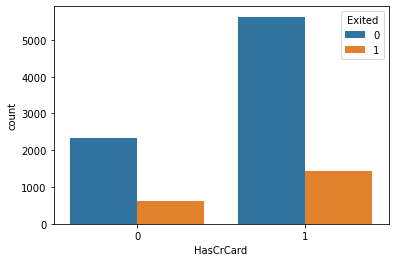

In [58]:
sns.countplot(x="HasCrCard", hue='Exited', data= df)

<AxesSubplot:xlabel='NumOfProducts', ylabel='count'>

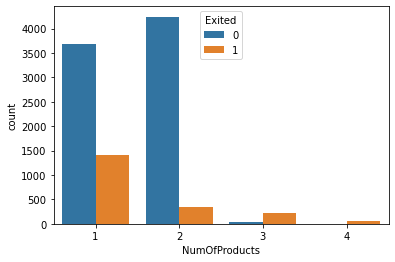

In [60]:
sns.countplot(x="NumOfProducts", hue='Exited', data= df)

In [71]:
a = [4,8,15,16,23,42]
print(a)
ar = np.array(a)
ar - 3

[4, 8, 15, 16, 23, 42]


array([ 1,  5, 12, 13, 20, 39])

In [83]:
df.drop('RowNumber', axis = 1, inplace=True)

In [84]:
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,isRich
0,15634602,Hargrave,619,France,1,42,2.0,0.00,1,1,1,101348.88,1,False
1,15647311,Hill,608,Spain,1,41,1.0,83807.86,1,0,1,112542.58,0,False
2,15619304,Onio,502,France,1,42,8.0,159660.80,3,1,0,113931.57,1,False
3,15701354,Boni,699,France,1,39,1.0,0.00,2,0,0,93826.63,0,False
4,15737888,Mitchell,850,Spain,1,43,2.0,125510.82,1,1,1,79084.10,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,0,39,5.0,0.00,2,1,0,96270.64,0,False
9996,15569892,Johnstone,516,France,0,35,10.0,57369.61,1,1,1,101699.77,0,False
9997,15584532,Liu,709,France,1,36,7.0,0.00,1,0,1,42085.58,1,False
9998,15682355,Sabbatini,772,Germany,0,42,3.0,75075.31,2,1,0,92888.52,1,False


In [90]:
a

[4, 8, 15, 16, 23, 42]

In [92]:
b = [ str(symbol)+'a' for symbol in a ]
b

['4a', '8a', '15a', '16a', '23a', '42a']

In [95]:
'{} in {} on {}, {}, {}, {}'.format(*a)

'4 in 8 on 15, 16, 23, 42'

🛠 Сколько мужчин и женщин являются клиентами банка

In [ ]:
# Код здесь

🛠 Сколько мужчин имело больше 3 продуктов

In [105]:
# Код здесь


🛠 Каковы медиана и стандартное отклонение зарплаты (EstimatedSalary)? Округлите до 2 десятичных знаков.


In [ ]:
# Код здесь

🛠 Правда ли, что женщины уходят от банка чаще мужчин? Каковы доли в обеих группах?


In [ ]:
# Код здесь

🛠 Самая популярная фамилия среди клиентов


In [ ]:
# Код здесь

🛠 Правда ли, что клиенты моложе 30 лет более лояльны, чем клиенты старше 60 лет? Какова доля вышедших из банка в обеих группах?


In [ ]:
# Код здесь

🛠 Как отличается средний возраст мужчин / женщин в зависимости от страны обслуживания? 


In [ ]:
# Код здесь

Факультативные тетрадки по [numpy](https://github.com/Yorko/mlcourse.ai/blob/main/jupyter_russian/topic01_pandas_data_analysis/lesson1_part0_numpy.ipynb) и [pandas](https://github.com/Yorko/mlcourse.ai/blob/main/jupyter_russian/topic01_pandas_data_analysis/lesson1_part1_pandas_intro.ipynb)